# Without PCA LDA

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using original features
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")



Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.6241
Precision: 0.6355
Recall: 0.6241
F1-score: 0.5778

Logistic Regression:
Training Accuracy: 0.9937
Testing Accuracy: 0.8431
Precision: 0.8486
Recall: 0.8431
F1-score: 0.8380


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost:
Training Accuracy: 0.4843
Testing Accuracy: 0.4599
Precision: 0.4335
Recall: 0.4599
F1-score: 0.4051

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.4088
Precision: 0.4119
Recall: 0.4088
F1-score: 0.4058

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.6642
Precision: 0.6695
Recall: 0.6642
F1-score: 0.6433

KNN:
Training Accuracy: 0.7398
Testing Accuracy: 0.5839
Precision: 0.6053
Recall: 0.5839
F1-score: 0.5650

SVM:
Training Accuracy: 0.9796
Testing Accuracy: 0.8212
Precision: 0.8541
Recall: 0.8212
F1-score: 0.8108

Naïve Bayes:
Training Accuracy: 0.5533
Testing Accuracy: 0.4854
Precision: 0.6255
Recall: 0.4854
F1-score: 0.4778

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.6314
Precision: 0.6165
Recall: 0.6314
F1-score: 0.5984


# PCA components are linear combinations of original feature

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit','Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=15)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

# Print the most valuable features for each principal component
components = pca.components_
most_valuable_features = [np.abs(components[i]).argmax() for i in range(components.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using PCA reduced features
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600052 0.07303987 0.03795318 0.03237249
 0.02827055 0.02764136 0.02386013 0.02131496 0.02007156 0.01856058
 0.01755977 0.01632163 0.0157788 ]

Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT
Principal Component 11: NP1URIN
Principal Component 12: NP1PAIN
Principal Component 13: NP1PAIN
Principal Component 14: NP3RTARU
Principal Component 15: NP1CNST


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.7482
Precision: 0.7644
Recall: 0.7482
F1-score: 0.7294

Logistic Regression:
Training Accuracy: 0.9451
Testing Accuracy: 0.8905
Precision: 0.9033
Recall: 0.8905
F1-score: 0.8855

AdaBoost:
Training Accuracy: 0.5392
Testing Accuracy: 0.5036
Precision: 0.3291
Recall: 0.5036
F1-score: 0.3840

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8175
Precision: 0.8201
Recall: 0.8175
F1-score: 0.8171

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8467
Precision: 0.8537
Recall: 0.8467
F1-score: 0.8440

KNN:
Training Accuracy: 0.7931
Testing Accuracy: 0.7190
Precision: 0.7427
Recall: 0.7190
F1-score: 0.7076

SVM:
Training Accuracy: 0.9561
Testing Accuracy: 0.8358
Precision: 0.8507
Recall: 0.8358
F1-score: 0.8271

Naïve Bayes:
Training Accuracy: 0.8323
Testing Accuracy: 0.7737
Precision: 0.7879
Recall: 0.7737
F1-score: 0.7689

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8540
Precision: 0.8665
Recall

In [32]:
# 1. Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600052 0.07303987 0.03795318 0.03237249
 0.02827055 0.02764136 0.02386013 0.02131496 0.02007156 0.01856058
 0.01755977 0.01632163 0.0157788 ]


Cumulative explained variance:
 [0.18554571 0.29208734 0.36808786 0.44112772 0.47908091 0.5114534
 0.53972394 0.56736531 0.59122543 0.61254039 0.63261195 0.65117253
 0.66873229 0.68505392 0.70083272]


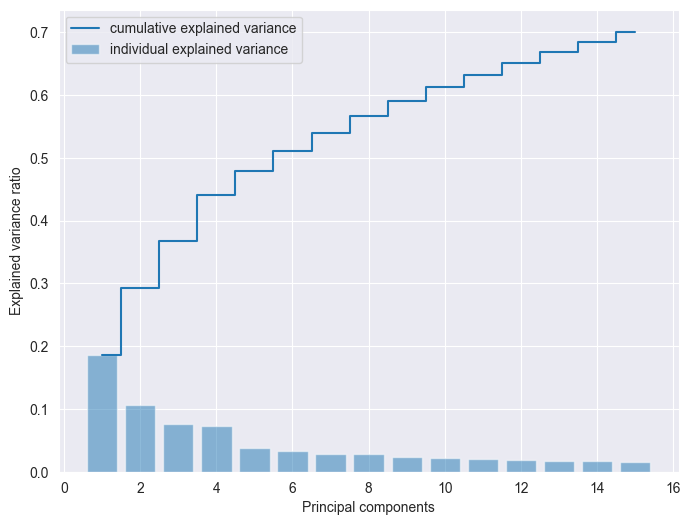

In [33]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [34]:
len(X_train_pca)

638

In [35]:
len(X_test_pca)

274

In [36]:
components = pca.components_
feature_names = X.columns

print("\nTop 20 features for each principal component:")
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    print(f"\nPrincipal Component {i+1}:")
    for feature in top_features:
        print(f"{feature}")


Top 20 features for each principal component:

Principal Component 1:
NP3FTAPL
NP3HMOVL
NP3TTAPL
NP2SALV
NP2HOBB

Principal Component 2:
NP3FTAPL
NP3PRSPL
NP3RTARU
NP3HMOVL
NP3TTAPL

Principal Component 3:
NP3RTCON
NP3RTARU
NP1SLPN
NP3FTAPR
NP3HMOVR

Principal Component 4:
NP3RTCON
NP2TRMR
NP3RTARU
NP3RTALU
NP1SLPN

Principal Component 5:
NP1SLPN
NP2SALV
NP2SPCH
NP1PAIN
NP2HWRT

Principal Component 6:
NP3RIGN
NP3RIGLL
NP3LGAGR
NP3TTAPR
NP3RIGLU

Principal Component 7:
NP1SLPN
NP2SALV
NP1ANXS
NP1DPRS
NP2WALK

Principal Component 8:
NP2HWRT
NP1URIN
NP3POSTR
NP3GAIT
NP3RISNG

Principal Component 9:
NP3TTAPL
NP3TTAPR
NP2SALV
NP3HMOVR
NP3LGAGR

Principal Component 10:
NP2HWRT
NP1ANXS
NP1DPRS
NP2SALV
NP1SLPD

Principal Component 11:
NP1URIN
NP1PAIN
NP1SLPN
NP3POSTR
NP1COG

Principal Component 12:
NP1PAIN
NP1URIN
NP1FATG
NP2SALV
NP1SLPN

Principal Component 13:
NP1PAIN
NP3KTRMR
NP2RISE
NP3PTRMR
NP1URIN

Principal Component 14:
NP3RTARU
NP3RTALU
NP3RIGRL
NP3FTAPL
NP3RIGN

Principal Component 

In [37]:
top_features_union = set()

for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    top_features_union.update(top_features)

# Print the union of top features and its length
print("\nUnion of top 20 features for each principal component:")
print(top_features_union)
print(f"\nLength of union features: {len(top_features_union)}")


Union of top 20 features for each principal component:
{'NP2WALK', 'NP3TTAPR', 'NP1SLPD', 'NP3RTCON', 'NP2SPCH', 'NP3RIGLU', 'NP3KTRMR', 'NP2TRMR', 'NP3RISNG', 'NP3HMOVL', 'NP3PRSPL', 'NP3HMOVR', 'NP1COG', 'NP3TTAPL', 'NP3GAIT', 'NP1SLPN', 'NP1PAIN', 'NP3POSTR', 'NP3RTARU', 'NP2HOBB', 'NP3PTRMR', 'NP3RIGRL', 'NP1URIN', 'NP3RIGN', 'NP3RIGLL', 'NP3FTAPR', 'NP3LGAGR', 'NP2SALV', 'NP1CNST', 'NP2HWRT', 'NP3RTALU', 'NP1ANXS', 'NP3FTAPL', 'NP1FATG', 'NP2RISE', 'NP1DPRS'}

Length of union features: 36


In [38]:
# 3. Principal Component Scores
print("Principal Component Scores (first 5 samples):\n", X_train_pca[:5])

Principal Component Scores (first 5 samples):
 [[ 3.73158556  0.26678975  0.37846131 -0.65851019  1.33058855  0.12570999
  -0.69305991  2.28120672 -0.89002624  1.71359435 -0.01124539  1.28639634
  -0.11122958 -0.12624972 -1.82965387]
 [-2.30294142  2.48157578 -0.39074437  0.34209154 -0.1007615   0.25133678
   1.05441267  0.35700877  0.39576173  0.4200861  -0.54957224  0.19770853
  -0.75629281  0.12213184  0.93741449]
 [ 0.63884418  2.32269836  0.48943233  0.12267898 -0.28650968 -0.10328766
   1.40729948  1.90557571  0.10334388  1.56039826 -0.52067645  1.07360441
  -1.14290908  0.79620613  0.34960025]
 [ 0.872903    1.02837029  1.34064643 -1.52826955 -0.28638478 -1.37353148
   0.21843832 -1.38704191 -0.24009591  0.40511099 -0.48639257  0.58306756
   0.53756103  0.27270309  0.23554709]
 [ 1.12414137  2.0677836  -1.11773815 -1.21496787 -2.05864037 -0.19269768
  -1.97776173 -0.83371953  1.91016856  1.08366409  1.17050243  0.75878797
  -0.8069582   0.33274806  0.69661677]]


In [39]:
# 4. Loading Scores
loading_scores = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nLoading scores (contributions of each feature to the principal components):")
print(loading_scores)


Loading scores (contributions of each feature to the principal components):
                    PC1       PC2       PC3       PC4       PC5       PC6  \
Area          -0.003017 -0.000343  0.014126 -0.014205 -0.000909  0.003330   
Circularity    0.002681 -0.002899 -0.002011  0.000294 -0.003492 -0.005466   
ConvexArea    -0.001486  0.001210  0.011413 -0.011541 -0.001990  0.004578   
EquivDiameter -0.007215  0.001598  0.008532 -0.010220  0.000637  0.000057   
Extent        -0.004122  0.000966 -0.006268 -0.005842 -0.003060 -0.007750   
...                 ...       ...       ...       ...       ...       ...   
NP3RTCON      -0.064161 -0.010013 -0.431708  0.608633 -0.003595  0.010594   
NP3SPCH        0.134180 -0.007565 -0.029892 -0.055972 -0.159996 -0.019092   
NP3TTAPL       0.198924 -0.269651 -0.028746  0.017672  0.079035  0.132164   
NP3TTAPR       0.184216  0.149800 -0.139426 -0.051678  0.133851  0.281011   
NHY            0.121963 -0.023089 -0.022682 -0.041906 -0.003421 -0.014873   

In [40]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first principal component:")
correlations = loading_scores['PC1']
print(correlations)


Correlation of each feature with the first principal component:
Area            -0.003017
Circularity      0.002681
ConvexArea      -0.001486
EquivDiameter   -0.007215
Extent          -0.004122
                   ...   
NP3RTCON        -0.064161
NP3SPCH          0.134180
NP3TTAPL         0.198924
NP3TTAPR         0.184216
NHY              0.121963
Name: PC1, Length: 91, dtype: float64


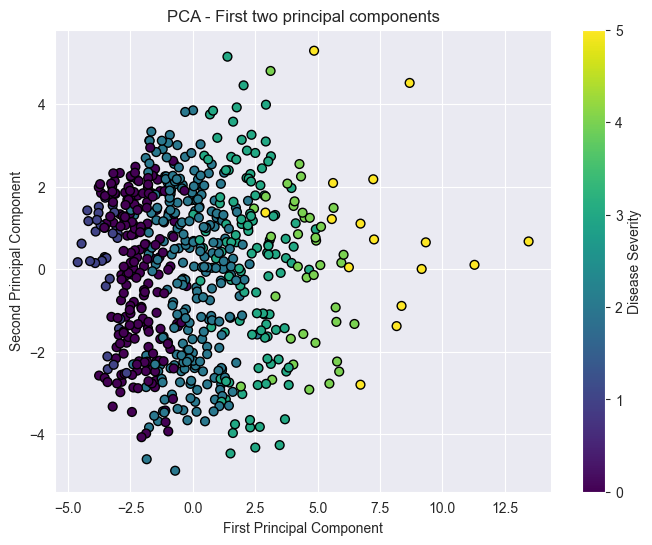

In [41]:
# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two principal components')
plt.colorbar(label='Disease Severity')
plt.show()


In [42]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 15


In [43]:

# 8. Feature Importance
most_valuable_features = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]


print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")


Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT
Principal Component 11: NP1URIN
Principal Component 12: NP1PAIN
Principal Component 13: NP1PAIN
Principal Component 14: NP3RTARU
Principal Component 15: NP1CNST



Correlation matrix of principal components:
 [[ 1.00000000e+00 -1.32952229e-17  2.36122988e-17 -2.14098701e-17
  -4.08387677e-17  3.61791592e-17  2.58100115e-17 -2.17517561e-17
   6.55534737e-17 -8.42191229e-17  2.58451206e-17 -7.96341834e-18
  -2.18325601e-17  7.07672451e-18  1.03642894e-16]
 [-1.32952229e-17  1.00000000e+00  1.35028722e-16  6.88691063e-17
   2.29660875e-17  2.98403750e-17  2.83839440e-17 -4.52106419e-17
   1.23584345e-17 -1.63443477e-17 -3.36859905e-18  3.50303169e-18
   1.53062709e-17 -1.92688817e-17 -4.55915195e-17]
 [ 2.36122988e-17  1.35028722e-16  1.00000000e+00  5.05057406e-16
   5.51087712e-17  2.16696668e-16  4.53688632e-17 -1.35947584e-17
  -3.03621799e-16 -8.03095284e-17  7.17915308e-17 -1.32722768e-16
  -5.96980149e-17  1.17207481e-16 -1.34950800e-17]
 [-2.14098701e-17  6.88691063e-17  5.05057406e-16  1.00000000e+00
  -2.44089648e-17  1.82602317e-16  1.71404579e-17 -1.38675513e-16
   8.95559374e-17 -9.08040244e-17  9.35743526e-17 -2.63632480e-16
  -1.0330

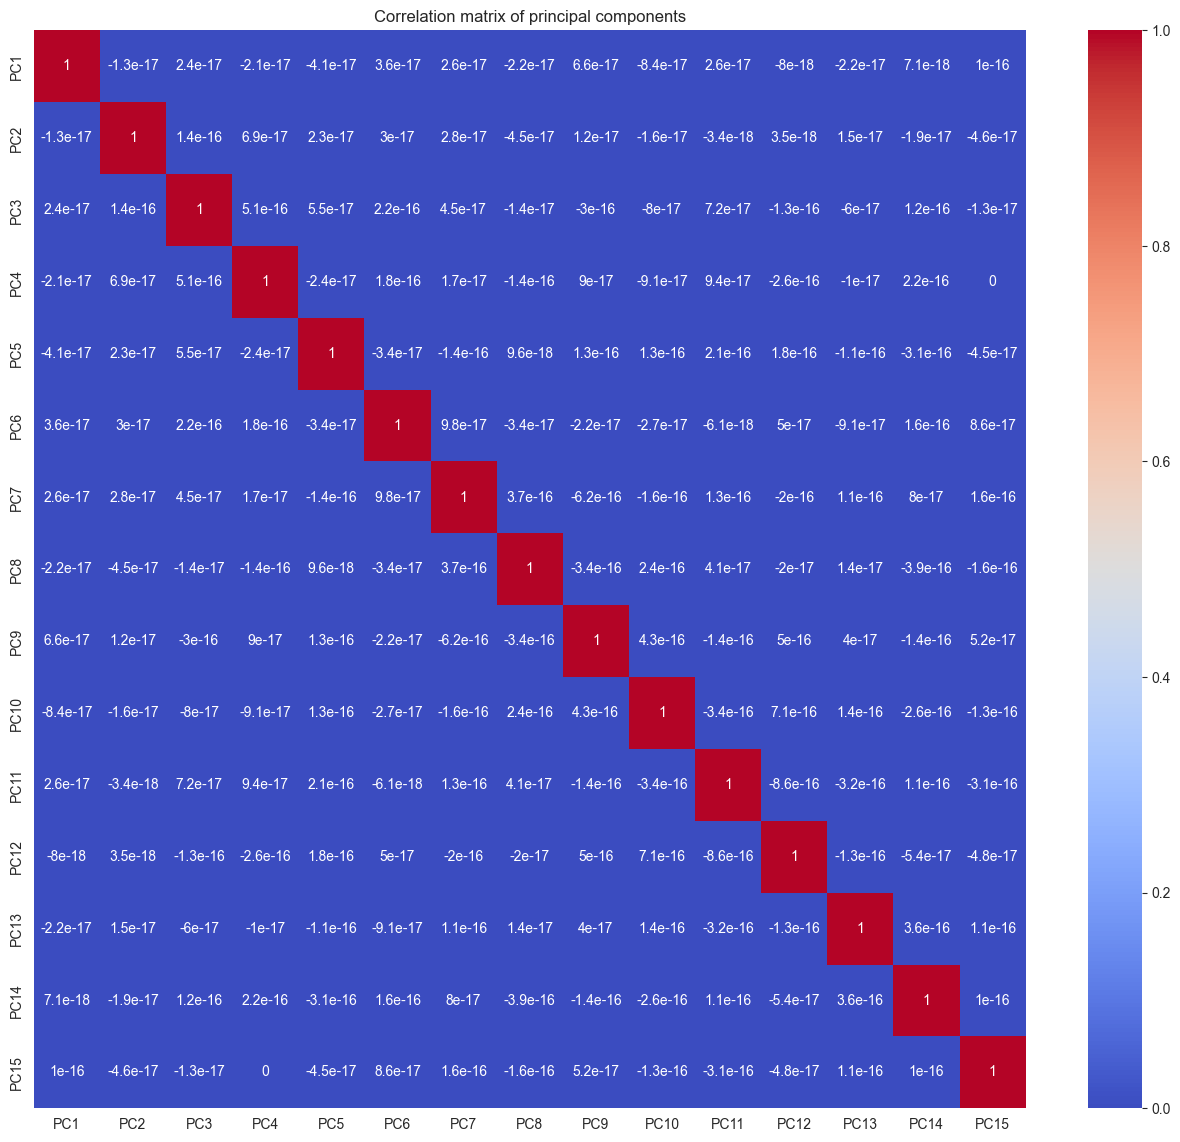

In [44]:
# 9. Multicollinearity
# PCA components are orthogonal, hence uncorrelated
correlation_matrix = np.corrcoef(X_train_pca.T)
print("\nCorrelation matrix of principal components:\n", correlation_matrix)

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)], yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.title('Correlation matrix of principal components')
plt.show()

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_components = min(X.shape[1], len(np.unique(y)) - 1)  # Ensure n_components is within valid range
print(n_components)
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train)
    y_train_pred = clf.predict(X_train_lda)
    y_test_pred = clf.predict(X_test_lda)
    
    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {test_precision:.4f}")
    print(f"Testing Recall: {test_recall:.4f}")
    print(f"Testing F1-score: {test_f1:.4f}")




5

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8796
Testing Precision: 0.8869
Testing Recall: 0.8796
Testing F1-score: 0.8742

Logistic Regression:
Training Accuracy: 0.9608
Testing Accuracy: 0.8431
Testing Precision: 0.8476
Testing Recall: 0.8431
Testing F1-score: 0.8380


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost:
Training Accuracy: 0.6129
Testing Accuracy: 0.5365
Testing Precision: 0.4373
Testing Recall: 0.5365
Testing F1-score: 0.4395

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8358
Testing Precision: 0.8420
Testing Recall: 0.8358
Testing F1-score: 0.8328

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8650
Testing Precision: 0.8709
Testing Recall: 0.8650
Testing F1-score: 0.8616

KNN:
Training Accuracy: 0.9639
Testing Accuracy: 0.8394
Testing Precision: 0.8487
Testing Recall: 0.8394
Testing F1-score: 0.8331

SVM:
Training Accuracy: 0.9655
Testing Accuracy: 0.8394
Testing Precision: 0.8540
Testing Recall: 0.8394
Testing F1-score: 0.8354

Naïve Bayes:
Training Accuracy: 0.9592
Testing Accuracy: 0.8723
Testing Precision: 0.8949
Testing Recall: 0.8723
Testing F1-score: 0.8738

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8540
Testing Precision: 0.8724
Testing Recall: 0.8540
Testing F1-score: 0.8513


In [46]:
# 1. Explained Variance
explained_variance = lda.explained_variance_ratio_
print("Explained variance ratio of each linear discriminant:\n", explained_variance)

Explained variance ratio of each linear discriminant:
 [0.91934566 0.03327494 0.02425811 0.01391601 0.00920528]


Cumulative explained variance:
 [0.91934566 0.9526206  0.97687871 0.99079472 1.        ]


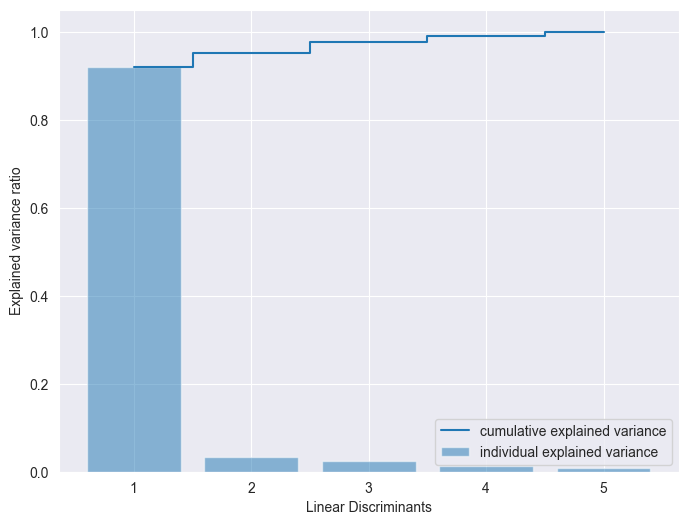

In [47]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.show()

In [48]:
# 3. Principal Component Scores
print("Linear Discriminant Scores (first 5 samples):\n", X_train_lda[:5])

Linear Discriminant Scores (first 5 samples):
 [[ 4.25013002 -0.22847413 -0.53237742  0.53731739  0.44748277]
 [-2.78952911  0.35078869 -0.7972776   0.5693765   0.02579577]
 [ 1.58855256 -0.36014116  0.03318462 -1.05268653  0.11762723]
 [-0.07156362 -1.45207798  0.0547041   0.0381225   1.45905378]
 [ 1.33005914  1.5610691   1.20151824  0.51930589 -0.48712186]]


In [49]:
# 4. Loading Scores
loading_scores = pd.DataFrame(lda.scalings_, index=X.columns, columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])])
print("\nLoading scores (contributions of each feature to the linear discriminants):")
print(loading_scores)


Loading scores (contributions of each feature to the linear discriminants):
                     LD1         LD2        LD3        LD4        LD5
Area           15.183195  102.628312  25.912894  46.984293  14.946919
Circularity     0.180005   -0.666588  -0.800250   2.118727  -1.510794
ConvexArea     -3.328259    1.302332  -2.343871   3.499897   4.187623
EquivDiameter  -3.703883   -6.507613 -10.299550   2.963924  -4.565365
Extent          0.238001   -0.911154   1.270719   0.748494   0.621236
...                  ...         ...        ...        ...        ...
NP3RTCON        0.305726    0.044085   0.100677  -0.417540   0.097781
NP3SPCH         0.186278    0.012802  -0.046338  -0.016770  -0.047664
NP3TTAPL        0.257083    0.198543   0.451901   0.156702  -0.369210
NP3TTAPR        0.120897   -0.086494  -0.100370   0.072234   0.385018
NHY            -0.219869    0.064794   0.985396  -0.599454   0.480402

[91 rows x 5 columns]


In [65]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first linear discriminant:")
correlations = loading_scores['LD1']
print(correlations)


Correlation of each feature with the first linear discriminant:
Area             15.183195
Circularity       0.180005
ConvexArea       -3.328259
EquivDiameter    -3.703883
Extent            0.238001
                   ...    
NP3RTCON          0.305726
NP3SPCH           0.186278
NP3TTAPL          0.257083
NP3TTAPR          0.120897
NHY              -0.219869
Name: LD1, Length: 91, dtype: float64


In [66]:
correlations

Area             15.183195
Circularity       0.180005
ConvexArea       -3.328259
EquivDiameter    -3.703883
Extent            0.238001
                   ...    
NP3RTCON          0.305726
NP3SPCH           0.186278
NP3TTAPL          0.257083
NP3TTAPR          0.120897
NHY              -0.219869
Name: LD1, Length: 91, dtype: float64

In [68]:
# Print top 20 features for each LDA component
print("Top 20 features for each LDA component:")
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:10]
    top_20_features = X.columns[top_20_idx]
    print(f"Component {i+1}: {top_20_features.tolist()}")

# Example of printing the length of union of top 20 features
union_features = set()
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:10]
    top_20_features = X.columns[top_20_idx]
    union_features.update(top_20_features.tolist())
print("\nUnion of top 20 features for each LDA component:")
print(union_features)
print(f"\nLength of union of top 20 features across all components: {len(union_features)}")

Top 20 features for each LDA component:
Component 1: ['Area', 'FilledArea', 'lbp_energy', 'dissimilarity', 'contrast', 'NP2FREZ_4', 'NP3KTRMR_3.0', 'NP2HYGN_3', 'NP3RIGRL_4.0', 'NP3SPCH_3.0']
Component 2: ['Area', 'FilledArea', 'Standard Deviation', 'NP2TURN_3', 'lbp_energy', 'NP3LGAGL_4.0', 'NP3RIGRL_4.0', 'NP3SPCH_3.0', 'energy', 'NP2FREZ_4']
Component 3: ['Shannon_Entropy', 'homogeneity', 'Area', 'FilledArea', 'Standard Deviation', 'contrast', 'lbp_entropy', 'dissimilarity', 'lbp_energy', 'NP3TTAPL_4.0']
Component 4: ['Shannon_Entropy', 'homogeneity', 'Skewness', 'gabor_entropy', 'Kurtosis', 'energy', 'brightness', 'Mean', 'gabor_energy', 'NP2TURN_3']
Component 5: ['homogeneity', 'Shannon_Entropy', 'gabor_entropy', 'Standard Deviation', 'Skewness', 'gabor_energy', 'lbp_energy', 'Kurtosis', 'energy', 'brightness']

Union of top 20 features for each LDA component:
{'FilledArea', 'Mean', 'Standard Deviation', 'Skewness', 'brightness', 'contrast', 'lbp_entropy', 'NP3LGAGL_4.0', 'NP2FREZ

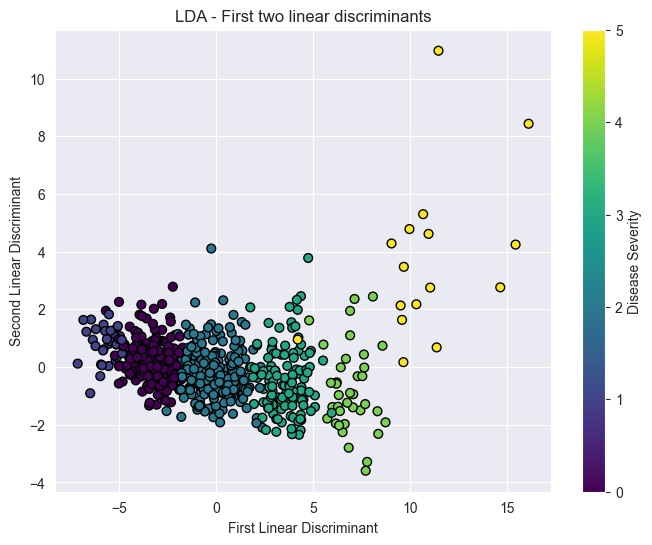

In [53]:
# 6. Visualization

plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA - First two linear discriminants')
plt.colorbar(label='Disease Severity')
plt.show()


In [54]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 4


In [55]:
# 8. Feature Importance
most_valuable_features = [np.abs(lda.scalings_[:, i]).argmax() for i in range(lda.scalings_.shape[1])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each linear discriminant:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1}: {feature}")


Most valuable features for each linear discriminant:
Linear Discriminant 1: Shannon_Entropy
Linear Discriminant 2: Area
Linear Discriminant 3: gabor_energy
Linear Discriminant 4: FilledArea
Linear Discriminant 5: Skewness



Correlation matrix of linear discriminants:
 [[ 1.00000000e+00  2.79662325e-14 -6.28634592e-15 -2.79461984e-15
   2.53301163e-15]
 [ 2.79662325e-14  1.00000000e+00  3.17658408e-15 -9.81139343e-16
  -1.93915822e-15]
 [-6.28634592e-15  3.17658408e-15  1.00000000e+00 -2.91257606e-15
  -3.78595317e-15]
 [-2.79461984e-15 -9.81139343e-16 -2.91257606e-15  1.00000000e+00
  -3.57273951e-16]
 [ 2.53301163e-15 -1.93915822e-15 -3.78595317e-15 -3.57273951e-16
   1.00000000e+00]]


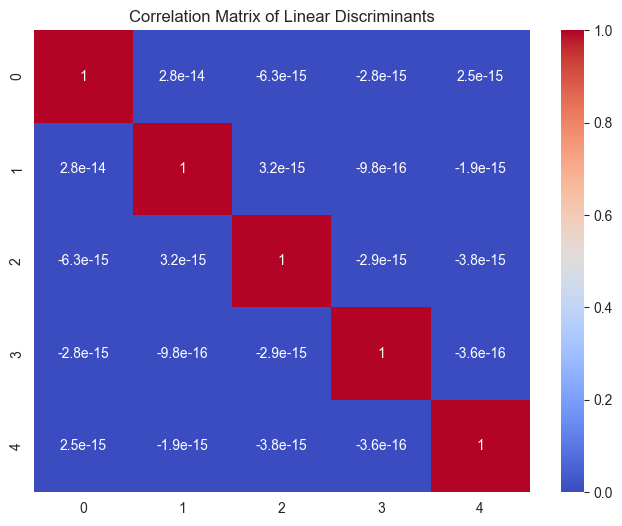

In [56]:
# 9. Multicollinearity
# LDA components are linear combinations, but we can check correlation among them
correlation_matrix = np.corrcoef(X_train_lda.T)
print("\nCorrelation matrix of linear discriminants:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Linear Discriminants')
plt.show()


In [57]:

# 10. Interpretation
# Interpretation often requires domain knowledge. The features contributing the most to each linear discriminant are the most important.
# These features can help in understanding the separation between classes.
print("\nInterpreting Linear Discriminants:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1} is largely influenced by {feature}.")


Interpreting Linear Discriminants:
Linear Discriminant 1 is largely influenced by Shannon_Entropy.
Linear Discriminant 2 is largely influenced by Area.
Linear Discriminant 3 is largely influenced by gabor_energy.
Linear Discriminant 4 is largely influenced by FilledArea.
Linear Discriminant 5 is largely influenced by Skewness.


Agglomerative Clustering Silhouette Score: 0.3695
K-Means Clustering Silhouette Score: 0.3725
Agglomerative Clustering ARI: 0.8976
K-Means Clustering ARI: 0.9016
Agglomerative Clustering NMI: 0.8833
K-Means Clustering NMI: 0.8886


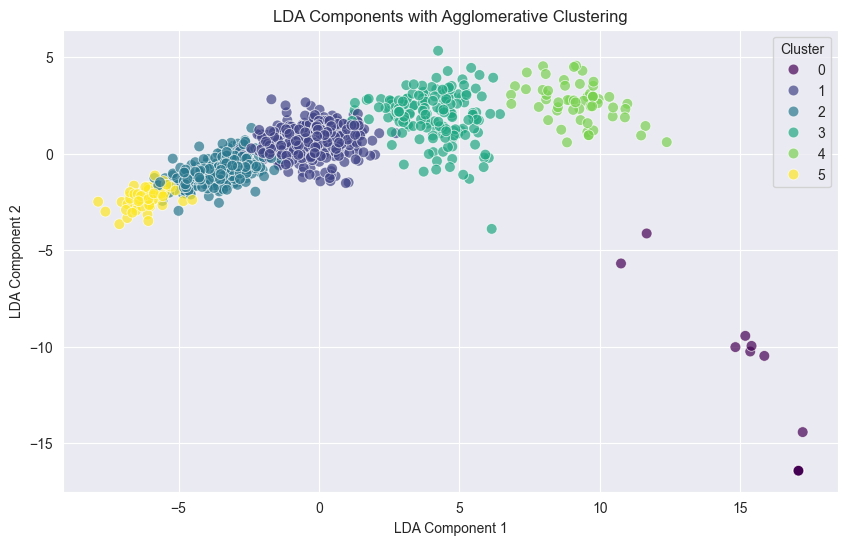

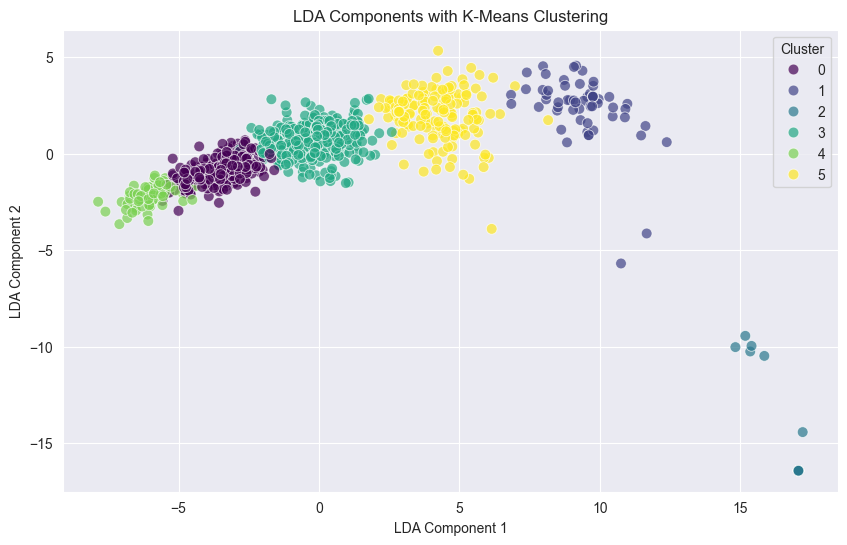

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_features)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Apply LDA for Dimensionality Reduction
lda = LDA(n_components=5)  # Reduce to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=len(np.unique(y)))
agg_clusters = agg_clustering.fit_predict(X_lda)

# Perform K-Means Clustering
n_clusters = len(np.unique(y))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_lda)

# Evaluate Clustering Results
agg_silhouette_avg = silhouette_score(X_lda, agg_clusters)
kmeans_silhouette_avg = silhouette_score(X_lda, kmeans_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_avg:.4f}')
print(f'K-Means Clustering Silhouette Score: {kmeans_silhouette_avg:.4f}')

# Calculate ARI and NMI
agg_ari = adjusted_rand_score(y, agg_clusters)
kmeans_ari = adjusted_rand_score(y, kmeans_clusters)
agg_nmi = normalized_mutual_info_score(y, agg_clusters)
kmeans_nmi = normalized_mutual_info_score(y, kmeans_clusters)

print(f'Agglomerative Clustering ARI: {agg_ari:.4f}')
print(f'K-Means Clustering ARI: {kmeans_ari:.4f}')
print(f'Agglomerative Clustering NMI: {agg_nmi:.4f}')
print(f'K-Means Clustering NMI: {kmeans_nmi:.4f}')

# Visualization Function
def plot_clustering_results(X_lda, clusters, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=clusters, palette='viridis', s=60, alpha=0.7)
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Visualize LDA results with Agglomerative Clustering
plot_clustering_results(X_lda, agg_clusters, 'LDA Components with Agglomerative Clustering')

# Visualize LDA results with K-Means Clustering
plot_clustering_results(X_lda, kmeans_clusters, 'LDA Components with K-Means Clustering')


In [59]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)  # Adjust number of clusters if needed
labels_agglomerative = agg_clustering.fit_predict(X_lda)

# Perform K-Means Clustering
kmeans_clustering = KMeans(n_clusters=4, random_state=0)  # Adjust number of clusters if needed
labels_kmeans = kmeans_clustering.fit_predict(X_lda)

# Print silhouette scores
silhouette_score_agglomerative = silhouette_score(X_lda, labels_agglomerative)
silhouette_score_kmeans = silhouette_score(X_lda, labels_kmeans)

print(f"Agglomerative Clustering Silhouette Score: {silhouette_score_agglomerative:.4f}")
print(f"K-Means Clustering Silhouette Score: {silhouette_score_kmeans:.4f}")


Agglomerative Clustering Silhouette Score: 0.5436
K-Means Clustering Silhouette Score: 0.5436


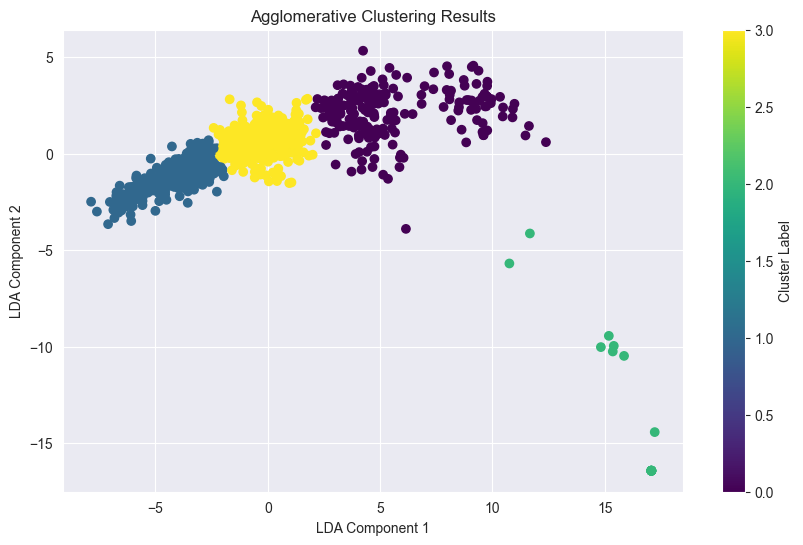

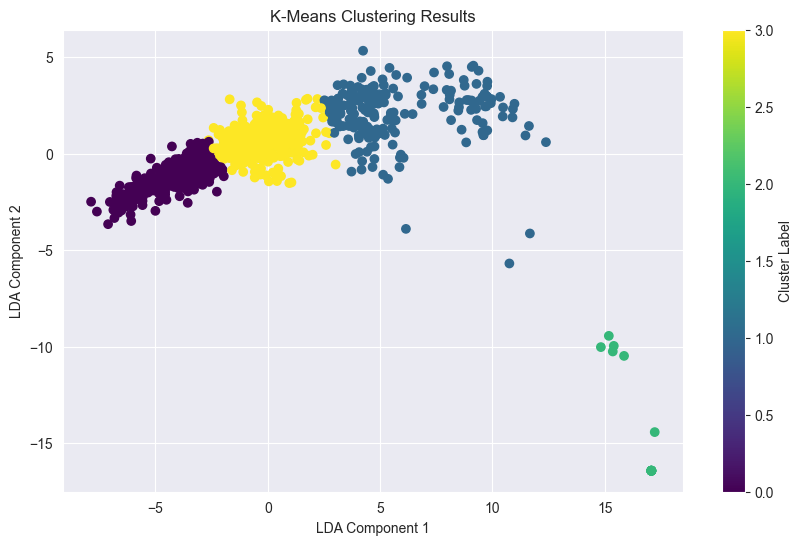

In [60]:
import matplotlib.pyplot as plt

# Plot LDA components with cluster labels
def plot_clusters(X_lda, labels, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, cmap='viridis', marker='o')
    plt.colorbar(scatter, label='Cluster Label')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.title(title)
    plt.show()

# Plot for Agglomerative Clustering
plot_clusters(X_lda, labels_agglomerative, 'Agglomerative Clustering Results')

# Plot for K-Means Clustering
plot_clusters(X_lda, labels_kmeans, 'K-Means Clustering Results')


In [61]:
import pandas as pd

# Ensure 'data' is a DataFrame
data_with_clusters = data.copy()

# Add cluster labels to the DataFrame
data_with_clusters['Agglomerative_Cluster'] = labels_agglomerative
data_with_clusters['KMeans_Cluster'] = labels_kmeans

# Select only numeric columns for analysis
numeric_data = data_with_clusters.select_dtypes(include=[np.number])

# Analyze characteristics for Agglomerative Clustering
agg_cluster_means = numeric_data.groupby(data_with_clusters['Agglomerative_Cluster']).mean()

# Analyze characteristics for K-Means Clustering
kmeans_cluster_means = numeric_data.groupby(data_with_clusters['KMeans_Cluster']).mean()

print("Agglomerative Clustering Cluster Characteristics:\n", agg_cluster_means)
print("\nK-Means Clustering Cluster Characteristics:\n", kmeans_cluster_means)


Agglomerative Clustering Cluster Characteristics:
                         Patient ID      Area  Circularity  ConvexArea  \
Agglomerative_Cluster                                                   
0                      6919.154930  0.361520     0.065046    0.271864   
1                      5633.675439  0.391752     0.042131    0.291291   
2                      3383.400000  0.405973     0.049772    0.311328   
3                      6251.581602  0.373991     0.043509    0.279024   

                       EquivDiameter    Extent  FilledArea  Kurtosis  \
Agglomerative_Cluster                                                  
0                           0.539047  0.477182    0.361564  0.278596   
1                           0.581647  0.486717    0.391860  0.295283   
2                           0.544203  0.438993    0.405988  0.219642   
3                           0.560573  0.486559    0.374159  0.296742   

                       Major axis length      Mean  ...  DATSCAN_CAUDATE_R  \

In [62]:
import numpy as np

# Calculate feature variances within each cluster
def feature_variance_per_cluster(X, labels):
    cluster_var = {}
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_data = X[labels == label]
        cluster_var[label] = np.var(cluster_data, axis=0)
    return cluster_var

# Calculate for Agglomerative Clustering
feature_var_agglomerative = feature_variance_per_cluster(X, labels_agglomerative)

# Calculate for K-Means Clustering
feature_var_kmeans = feature_variance_per_cluster(X, labels_kmeans)

# Print feature variances
print("Feature Variance per Cluster for Agglomerative Clustering:")
for label, var in feature_var_agglomerative.items():
    print(f"Cluster {label}: {var}")

print("\nFeature Variance per Cluster for K-Means Clustering:")
for label, var in feature_var_kmeans.items():
    print(f"Cluster {label}: {var}")


Feature Variance per Cluster for Agglomerative Clustering:
Cluster 0: Area             0.038104
Circularity      0.023563
ConvexArea       0.026509
EquivDiameter    0.035539
Extent           0.017031
                   ...   
NHY_1.0          0.077366
NHY_2.0          0.140448
NHY_3.0          0.073442
NHY_4.0          0.004673
NHY_5.0          0.000000
Length: 304, dtype: float64
Cluster 1: Area             0.033998
Circularity      0.010077
ConvexArea       0.022909
EquivDiameter    0.027270
Extent           0.010517
                   ...   
NHY_1.0          0.238920
NHY_2.0          0.236321
NHY_3.0          0.008695
NHY_4.0          0.000000
NHY_5.0          0.000000
Length: 304, dtype: float64
Cluster 2: Area             0.064512
Circularity      0.003101
ConvexArea       0.049941
EquivDiameter    0.059363
Extent           0.015916
                   ...   
NHY_1.0          0.047500
NHY_2.0          0.227500
NHY_3.0          0.210000
NHY_4.0          0.187500
NHY_5.0          0.0

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode the target variable
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])

# Define the response variable and predictors
response = target_column
predictors = numerical_features + categorical_features

# Fit the Linear Mixed Effects Model
# 'Patient ID' is the random effect to account for individual differences
model = MixedLM(data[response], data[predictors], groups=data['Patient ID'])

# Fit the model
mixed_lm_result = model.fit()

# Print the summary of the model
print(mixed_lm_result.summary())


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


              Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Disease_Severity
No. Observations:   912      Method:              REML            
No. Groups:         228      Scale:               1.1203          
Min. group size:    4        Log-Likelihood:      -1347.0698      
Max. group size:    4        Converged:           Yes             
Mean group size:    4.0                                           
------------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------------
Area                   -3.861                                     
Circularity            -0.151    0.367 -0.411 0.681  -0.869  0.568
ConvexArea             -1.264    2.151 -0.588 0.557  -5.480  2.952
EquivDiameter          -1.393    1.873 -0.744 0.457  -5.063  2.277
Extent                 -0.243    0.570 -0.427 0.670  -1.361  0.875
FilledArea

B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode the target variable
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])

# Fit a Growth Curve Model
# Adding Visit as a fixed effect to model time-dependent changes
# 'Patient ID' is the random effect to account for individual trajectories

# Define the formula for the growth curve model
import statsmodels.formula.api as smf

# Including both fixed effects (Visit) and random effects (by Patient ID)
model = smf.mixedlm(f"{target_column} ~ Visit", data, groups=data["Patient ID"], re_formula="~Visit")

# Fit the model
growth_curve_model = model.fit()

# Print the summary of the model
print(growth_curve_model.summary())


                 Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Disease_Severity
No. Observations:     912        Method:                REML            
No. Groups:           228        Scale:                 0.6593          
Min. group size:      4          Log-Likelihood:        -1403.9057      
Max. group size:      4          Converged:             Yes             
Mean group size:      4.0                                               
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      1.289    0.076 16.968 0.000  1.141  1.438
Visit[T.V2]                    0.303    0.089  3.383 0.001  0.127  0.478
Visit[T.V3]                    0.364    0.087  4.168 0.000  0.193  0.535
Visit[T.V4]                    0.917    0.089 10.306 0.000  0.742  1.

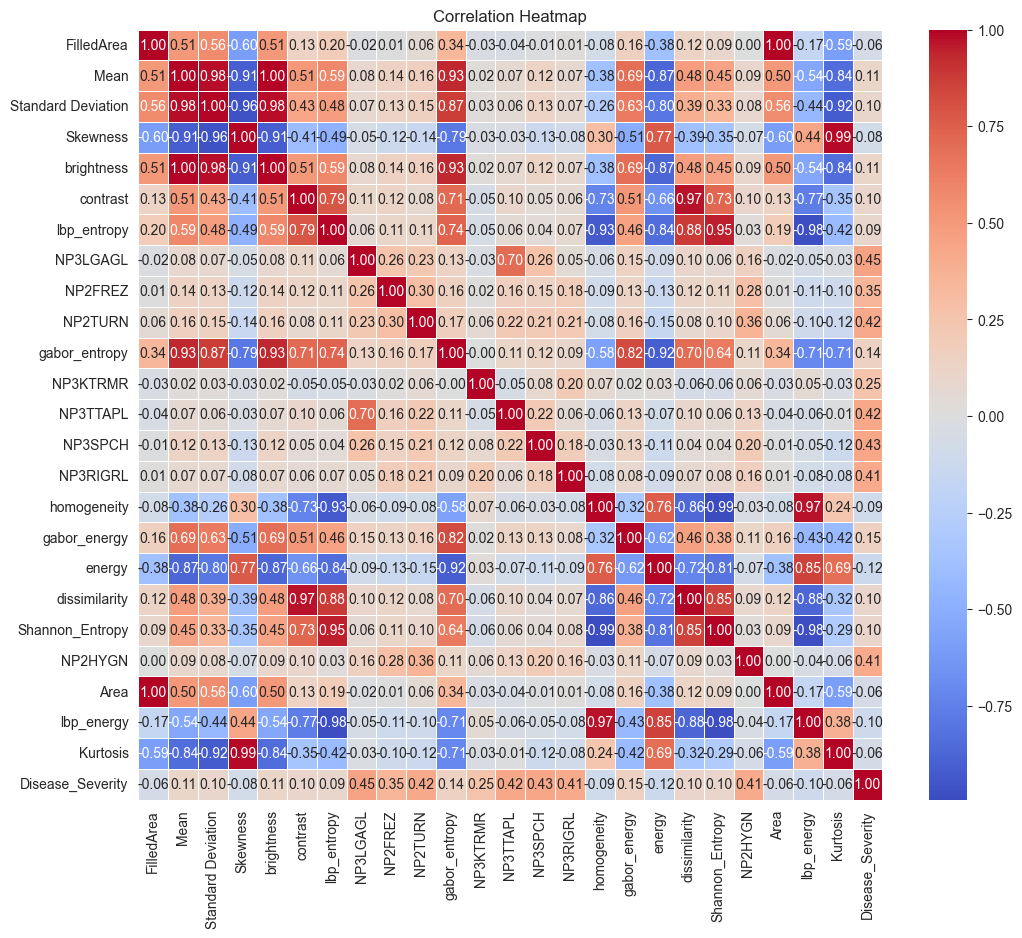

Point Biserial Correlation Results:
                    Correlation       p-value
NP3LGAGL               0.451846  4.365350e-47
NP3SPCH                0.434370  2.920418e-43
NP3TTAPL               0.423975  4.336989e-41
NP3RIGRL               0.411975  1.126152e-38
NP3KTRMR               0.254417  6.121129e-15
gabor_energy           0.151001  4.646408e-06
gabor_entropy          0.138877  2.568989e-05
energy                -0.118949  3.181829e-04
brightness             0.105780  1.378692e-03
Mean                   0.105780  1.378692e-03
contrast               0.103980  1.664506e-03
lbp_energy            -0.103074  1.828295e-03
Shannon_Entropy        0.102745  1.891275e-03
dissimilarity          0.102465  1.946466e-03
Standard Deviation     0.095476  3.902457e-03
homogeneity           -0.093655  4.645204e-03
lbp_entropy            0.091149  5.876505e-03
Skewness              -0.079425  1.643556e-02
Kurtosis              -0.063557  5.502522e-02
FilledArea            -0.060154  6.940766e-0

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, f_oneway, chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and target variable
features_to_test = [
    'FilledArea', 'Mean', 'Standard Deviation', 'Skewness', 'brightness',
    'contrast', 'lbp_entropy', 'NP3LGAGL', 'NP2FREZ', 'NP2TURN',
    'gabor_entropy', 'NP3KTRMR', 'NP3TTAPL', 'NP3SPCH',
    'NP3RIGRL', 'homogeneity', 'gabor_energy', 'energy', 'dissimilarity',
    'Shannon_Entropy', 'NP2HYGN', 'Area', 'lbp_energy', 'Kurtosis'
]
target_variable = 'Disease_Severity'

# Encode categorical target variable if necessary
label_encoder = LabelEncoder()
data[target_variable] = label_encoder.fit_transform(data[target_variable])

# Calculate correlations
numerical_data = data[features_to_test + [target_variable]]

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Initialize dictionaries to store results
point_biserial_results = {}
anova_results = {}
chi_square_results = {}

# Point Biserial Correlation (for binary target)
for feature in features_to_test:
    if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
        correlation, p_value = pointbiserialr(data[feature], data[target_variable])
        point_biserial_results[feature] = (correlation, p_value)

# Convert results to DataFrame
point_biserial_df = pd.DataFrame.from_dict(point_biserial_results, orient='index', columns=['Correlation', 'p-value'])
point_biserial_df.sort_values(by='p-value', ascending=True, inplace=True)

# ANOVA (for multi-class target)
unique_categories = data[target_variable].unique()
if len(unique_categories) > 2:  # Check if target variable is multi-class
    for feature in features_to_test:
        if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
            groups = [data[data[target_variable] == category][feature] for category in unique_categories]
            f_stat, p_value = f_oneway(*groups)
            anova_results[feature] = (f_stat, p_value)

    # Convert results to DataFrame
    anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
    anova_df.sort_values(by='p-value', ascending=True, inplace=True)

# Chi-Square Test (for categorical features)
categorical_features = ['NP3LGAGL', 'NP2FREZ', 'NP2TURN', 'NP3KTRMR', 'NP3TTAPL', 'NP3SPCH', 'NP3RIGRL', 'NP2HYGN']
for feature in categorical_features:
    if data[feature].dtype == 'object':  # Ensure the feature is categorical
        contingency_table = pd.crosstab(data[feature], data[target_variable])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi_square_results[feature] = p

# Convert results to DataFrame
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=['p-value'])
chi_square_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print results
print("Point Biserial Correlation Results:")
print(point_biserial_df)

if len(unique_categories) > 2:
    print("\nANOVA Results:")
    print(anova_df)

print("\nChi-Square Test Results:")
print(chi_square_df)


Pairwise p-values for each feature:
                       V1_V2     V1_V3         V1_V4     V2_V3     V2_V4  \
Area                0.038717  0.016150  2.530487e-01  0.745365  0.389618   
FilledArea          0.038375  0.015592  2.512370e-01  0.736107  0.389906   
Kurtosis            0.000928  0.000041  1.154652e-04  0.317051  0.403772   
Mean                0.028002  0.000552  4.391060e-04  0.173317  0.135598   
NP2FREZ             0.005598  0.001190  1.263128e-06  0.287500  0.004052   
NP2HYGN             0.195673  0.639884  6.348406e-03  0.387928  0.124807   
NP2TURN             0.000039  0.000784  2.831086e-13  0.489945  0.000346   
NP3KTRMR            0.175525  0.142863  2.231593e-02  0.863830  0.323994   
NP3LGAGL            0.085113  0.024045  1.169904e-07  0.626020  0.000326   
NP3RIGRL            0.171512  0.259995  2.209706e-03  0.875042  0.086870   
NP3SPCH             0.023531  0.013488  5.541910e-06  0.821382  0.017577   
NP3TTAPL            0.201501  0.108526  6.293131e-07

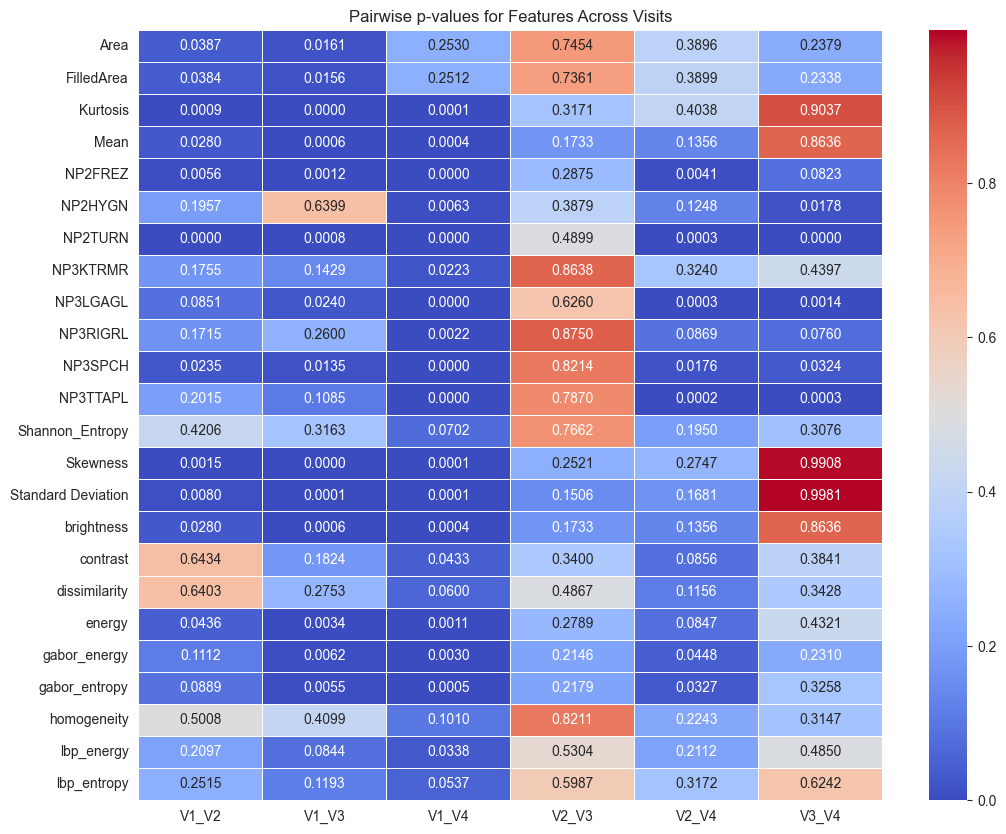

In [80]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and visits
features_to_test = [
    'FilledArea', 'Mean', 'Standard Deviation', 'Skewness', 'brightness',
    'contrast', 'lbp_entropy', 'NP3LGAGL', 'NP2FREZ', 'NP2TURN',
    'gabor_entropy', 'NP3KTRMR', 'NP3TTAPL', 'NP3SPCH',
    'NP3RIGRL', 'homogeneity', 'gabor_energy', 'energy', 'dissimilarity',
    'Shannon_Entropy', 'NP2HYGN', 'Area', 'lbp_energy', 'Kurtosis'
]
visit_pairs = [('V1', 'V2'), ('V1', 'V3'), ('V1', 'V4'), ('V2', 'V3'), ('V2', 'V4'), ('V3', 'V4')]

# Initialize dictionary to store results
pairwise_p_values = {}

# Iterate over each feature
for feature in features_to_test:
    feature_p_values = {}
    for v1, v2 in visit_pairs:
        # Subset data for each visit
        data_v1 = data[data['Visit'] == v1][feature].dropna()
        data_v2 = data[data['Visit'] == v2][feature].dropna()

        if len(data_v1) > 1 and len(data_v2) > 1:  # Ensure there are enough data points
            # Perform t-test
            t_stat, p_value = ttest_ind(data_v1, data_v2, nan_policy='omit')
            feature_p_values[f"{v1}_{v2}"] = p_value
        else:
            feature_p_values[f"{v1}_{v2}"] = np.nan  # Not enough data for comparison

    # Store results
    pairwise_p_values[feature] = feature_p_values

# Convert results to DataFrame for better readability
pairwise_p_values_df = pd.DataFrame(pairwise_p_values).T
pairwise_p_values_df.sort_index(inplace=True)

# Save results to CSV
pairwise_p_values_df.to_csv("pairwise_p_values.csv")

# Print results
print("Pairwise p-values for each feature:")
print(pairwise_p_values_df)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame from CSV if needed
# pairwise_p_values_df = pd.read_csv("pairwise_p_values.csv", index_col=0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pairwise_p_values_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Pairwise p-values for Features Across Visits")
plt.show()
